In [9]:
# Folder organization

# raw_root_data_dir:
#         └───20201106
#             ├───behavior
#             │       block.csv
#             │       events.csv
#             │       trial.csv
#             │
#             └───photometry
#                 └───01
#                         C40_11062020.csv

In [3]:
import datajoint as dj
from datetime import datetime 
import pandas as pd
from pathlib import Path
from ..workflow import db_prefix
from ..workflow.pipeline import session, ephys, subject, probe, lab, event, photometry

dj.conn()

DataJoint connection (connected) jaeronga@tutorial-db.datajoint.io:3306

In [2]:
# Insert subject and session info
subject.Subject.insert1(dict(subject='C40', 
                        sex='M', 
                        subject_birth_date='2000-01-01', 
                        subject_description=''), skip_duplicates=True)
session_key = dict(subject='C40', session_id=0)
session.Session.insert1(session_key, skip_duplicates=True)
session.SessionDirectory.insert1(dict(subject=session_key['subject'], session_id=session_key['session_id'], 
                                      session_dir='C40/20201106'), skip_duplicates=True)

In [2]:
# Populate behavior events
# event.BehaviorIngestion.populate()

In [ ]:
# Populate photometry tables
# photometry.FiberPhotometry.populate()

In [4]:
photometry.FiberPhotometry.TimeOffset()

subject,session_id,fiber_id id of the implanted fibers,time_offset (in second) time offset to synchronize the photometry traces to the master clock
C40,0,1,67.94


In [5]:
photometry.FiberPhotometry.Trace()

subject,session_id,fiber_id id of the implanted fibers,channel_id,excitation_wavelength,emission_color,"timestamps (in seconds) photometry timestamps, already synced to the master clock",trace
C40,0,1,0,405,green,=BLOB=,=BLOB=


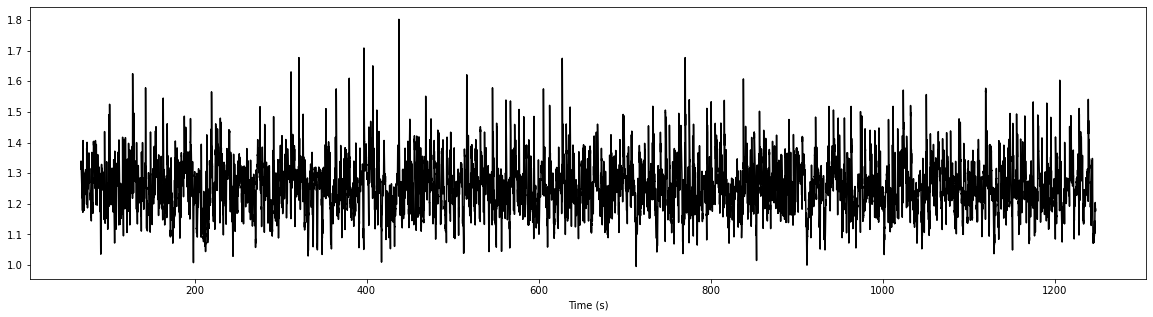

In [6]:
import matplotlib.pyplot as plt

timestamps, trace = photometry.FiberPhotometry.Trace.fetch1("timestamps", "trace")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(timestamps, trace, 'k')
ax.set_xlabel('Time (s)')
plt.show()


In [1]:
# Drop schemas in the order of dependencies
# trial.schema.drop()
# event.schema.drop()
# ephys.schema.drop()
# probe.schema.drop()
# session.schema.drop()
# subject.schema.drop()
# lab.schema.drop()
# photometry.schema.drop()
# dj.list_schemas()  # confirm